In [29]:
import numpy as np
import pandas as pd

data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [30]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Min Max analyzing

In [32]:
print("Max age: ",data['age'].max())
print("Min age: ",data['age'].min())

Max age:  82.0
Min age:  0.08


In [33]:
print("glucose max: ",data['avg_glucose_level'].max())
print("glucose min: ",data['avg_glucose_level'].min())

glucose max:  271.74
glucose min:  55.12


In [34]:
print("bmi max: ",data['bmi'].max())
print("bmi min: ",data['bmi'].min())

bmi max:  97.6
bmi min:  10.3


# Finding the Unique values

In [35]:
print(data['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [36]:
print(data['gender'].unique())

['Male' 'Female' 'Other']


In [37]:
print(data['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


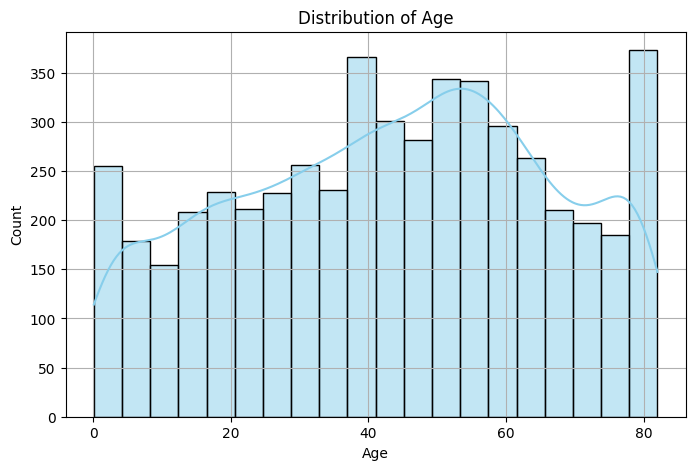

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data['age'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()


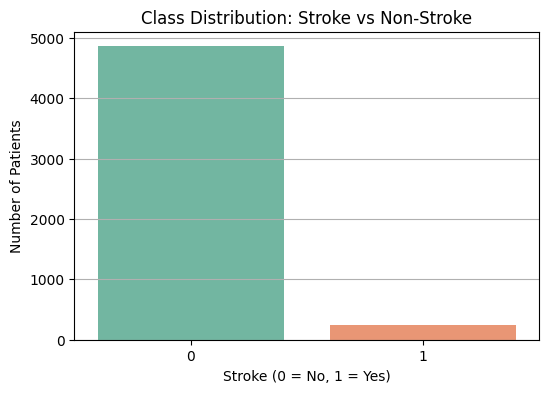

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='stroke', hue='stroke', palette='Set2', legend=False)
plt.title("Class Distribution: Stroke vs Non-Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.grid(axis='y')
plt.show()


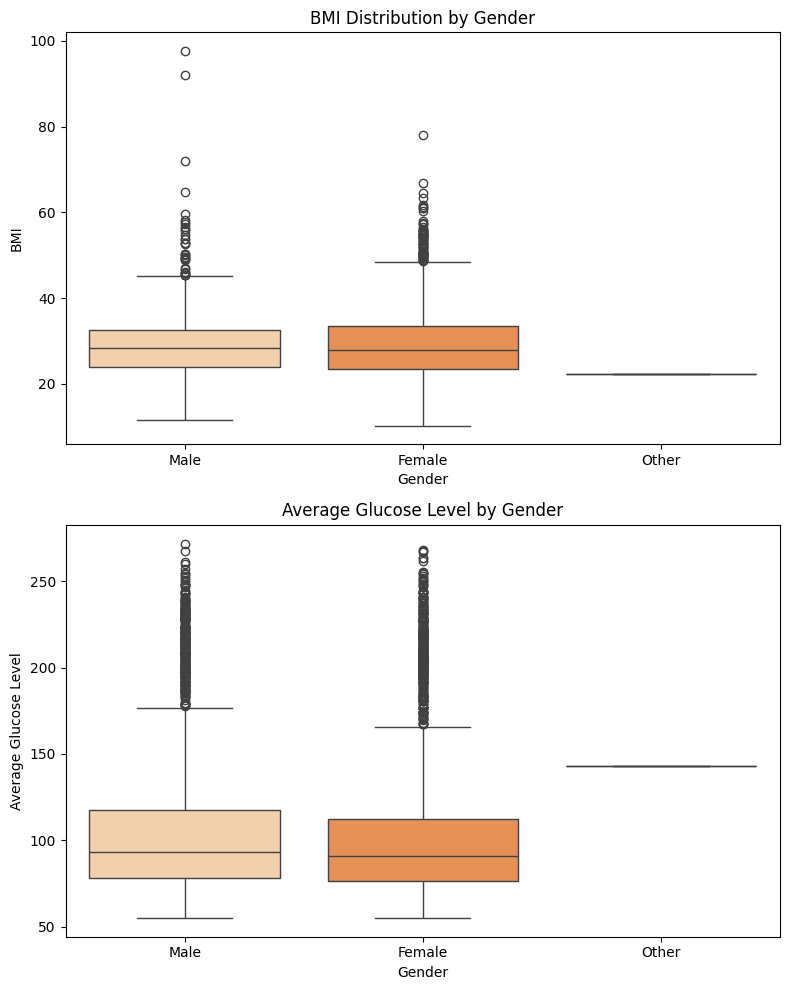

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(8, 10)

# Boxplot 1: BMI vs Gender
sns.boxplot(data=data, y="bmi", x="gender", hue="gender", ax=axes[0], palette="Oranges", legend=False)
axes[0].set_title("BMI Distribution by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("BMI")

# Boxplot 2: Avg Glucose Level vs Gender
sns.boxplot(data=data, y="avg_glucose_level", x="gender", hue="gender", ax=axes[1], palette="Oranges", legend=False)
axes[1].set_title("Average Glucose Level by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Average Glucose Level")

plt.tight_layout()
plt.show()


In [41]:
data[['age', 'avg_glucose_level', 'bmi']].agg(['min', 'max', 'mean', 'std'])

,age,avg_glucose_level,bmi
min,0.080000,55.120000,10.300000
max,82.000000,271.740000,97.600000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067


In [42]:
data[['age', 'avg_glucose_level', 'bmi']].skew()


age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

In [43]:
data['stroke'].value_counts()
data['stroke'].value_counts(normalize=True) * 100


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

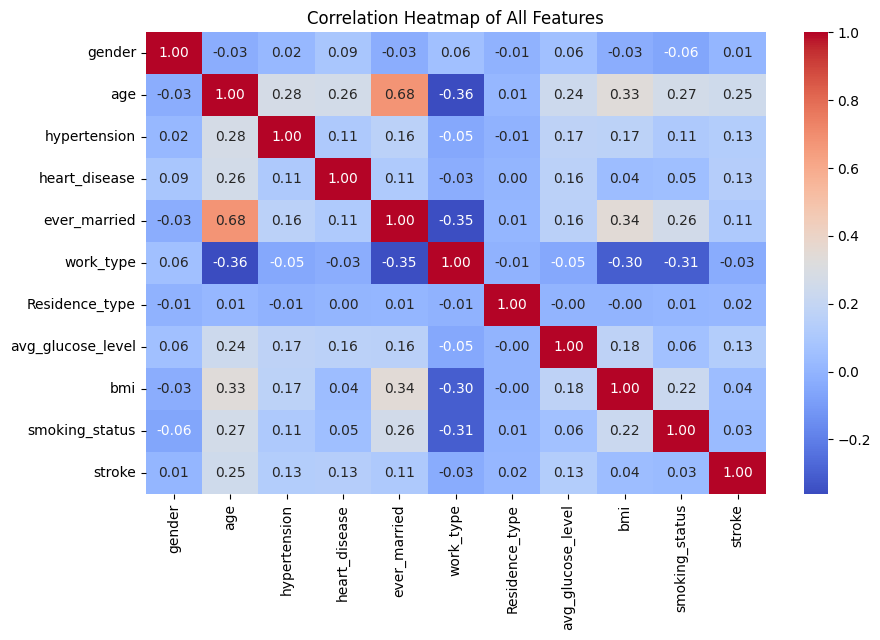

In [44]:
from sklearn.preprocessing import LabelEncoder

#Encode categorical features temp
df_encoded = data.copy()
label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

#Drop ID column
if 'id' in df_encoded.columns:
    df_encoded.drop(columns='id', inplace=True)

#Correlation matrix
corr_matrix = df_encoded.corr()

#Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()


In [46]:
corr_with_target = corr_matrix['stroke'].sort_values(ascending=False)
print(corr_with_target)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
work_type           -0.032316
Name: stroke, dtype: float64
